In [2]:
import pandas as pd
import numpy as np

问题1.1：分析这些玻璃文物表面风化与纹饰、类型、颜色的关系；

In [4]:
data=pd.read_excel('附件.xlsx',sheet_name='表单1')
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [5]:
data.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化'], dtype='object')

In [6]:
data.describe()

,文物编号
count,58.000000
mean,29.500000
std,16.886879
min,1.000000
25%,15.250000
50%,29.500000
75%,43.750000
max,58.000000


我们可以看到共有58个文物

In [11]:
data.isnull().sum()

文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64

我们注意我们有空值，填充空值,并输出为1.1.xlsx

In [14]:
data.dropna().to_excel('1.1.xlsx',index=None)

现在我的想法是对于这几个指标进行相关性分析和差异性分析
首先尝试一下差异性分析

算法：卡方检验分析
变量：变量Y:{表面风化}；变量X:{类型，颜色，纹饰}
首先我们先对其中的数据进行数值化

In [15]:
data = pd.read_excel("1.1.xlsx")
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [17]:
## labelencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
data["纹饰"] = LabelEncoder().fit_transform(np.array(data["纹饰"])).reshape(-1,1)
data["表面风化"] = LabelEncoder().fit_transform(np.array(data["表面风化"])).reshape(-1,1)
data["类型"] = LabelEncoder().fit_transform(np.array(data["类型"])).reshape(-1,1)
data["颜色"] = LabelEncoder().fit_transform(np.array(data["颜色"])).reshape(-1,1)
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,2,1,6,0
1,2,0,0,1,1
2,3,0,1,6,0
3,4,0,1,6,0
4,5,0,1,6,0


但是如果这样的话，对于高钾和铅钡，不能一概地用0，1去表示，所以我们尝试对于表格的数据进行0，1化，得到1.2.xlsx

In [18]:
data = pd.read_excel("1.2.xlsx")
data.head()

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0


首先对于纹饰进行卡方分析

In [26]:
data1= data[["纹饰_A","纹饰_B","纹饰_C","表面风化_风化","表面风化_无风化"]]
data1.head()

,纹饰_A,纹饰_B,纹饰_C,表面风化_风化,表面风化_无风化
0,0,0,1,0,1
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


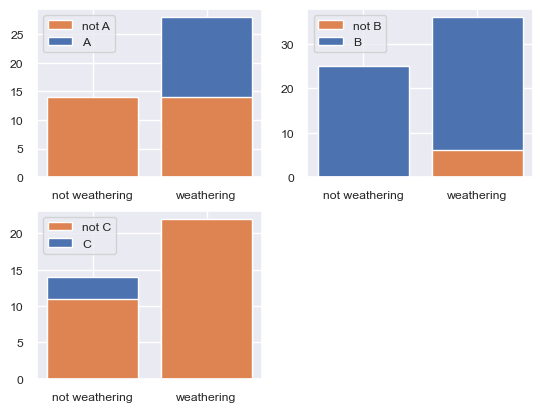

In [45]:
## 探索性绘图
import matplotlib.pyplot as plt
import seaborn as sns
a_table = pd.crosstab(data["纹饰_A"],data["表面风化_风化"],margins=True)
b_table = pd.crosstab(data["纹饰_B"],data["表面风化_风化"],margins=True)
c_table = pd.crosstab(data["纹饰_C"],data["表面风化_风化"],margins=True)
list1 = [a_table,b_table,c_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["not A","A","not B","B","not C","C"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    categories = ["not weathering","weathering"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()
# data["纹饰_A"].value_counts()
# categories = ["风化","未风化"]
# len(data1[(data1["纹饰_A"]==1)&(data1["表面风化_风化"])])


我们尝试写一下卡方检验，使用scipy进行，其中返回值chi2检验统计量，p-value,dof自由度，expected预期频率

In [50]:
from scipy import stats
j=1
for ob in list:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1


A p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))
B p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))
C p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))


重复上述过程对于颜色，类型进行检验

In [ ]:

a_table = pd.crosstab(data["纹饰_A"],data["表面风化_风化"],margins=True)
b_table = pd.crosstab(data["纹饰_B"],data["表面风化_风化"],margins=True)
c_table = pd.crosstab(data["纹饰_C"],data["表面风化_风化"],margins=True)
list1 = [a_table,b_table,c_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["not A","A","not B","B","not C","C"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    categories = ["not weathering","weathering"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

下面我们进行相关性分析：使用spearman相关系数

In [53]:
df = pd.read_excel("1.1.xlsx")
df.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [56]:
df2 = df[["纹饰","类型","颜色","表面风化"]]
df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
df2["类型"] = LabelEncoder().fit_transform(np.array(df2["类型"])).reshape(-1,1)
df2["颜色"] = LabelEncoder().fit_transform(np.array(df2["颜色"])).reshape(-1,1)

print(df2.corr('spearman'))

            纹饰        类型        颜色      表面风化
纹饰    1.000000 -0.134535 -0.223416  0.047862
类型   -0.134535  1.000000  0.412708 -0.316228
颜色   -0.223416  0.412708  1.000000  0.069605
表面风化  0.047862 -0.316228  0.069605  1.000000


C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s